In [579]:
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

from datetime import datetime
import time
import csv
sns.set_style("darkgrid")
results_2019 = pd.read_csv('./Runners_all_results_2019.csv', header = 0, encoding='latin-1', error_bad_lines=False)
results_2019['OfficialTime'] = results_2019['OfficialTime'].apply(lambda x: datetime.combine(datetime.min, datetime.strptime(x, '%H:%M:%S').time()) - datetime.min)
results_2019.head(2)

b'Skipping line 26144: expected 20 fields, saw 21\n'


,BibNumber,FullName,SortName,AgeOnRaceDay,Gender,City,StateAbbrev,StateName,Zip,CountryOfResAbbrev,CountryOfResName,CountryOfCtzAbbrev,CountryOfCtzName,OfficialTime,RankOverall,RankOverGender,RankOverDivision,EventGroup,SubGroupLabel,SubGroup
0,2,Lawrence Cherono,"Cherono, Lawrence",30,M,Eldoret,NaN,NaN,NaN,KEN,Kenya,KEN,Kenya,02:07:57,1,1,1,Runners,NaN,NaN
1,6,Lelisa Desisa,"Desisa, Lelisa",29,M,Ambo,NaN,NaN,NaN,ETH,Ethiopia,ETH,Ethiopia,02:07:59,2,2,2,Runners,NaN,NaN


In [580]:
results_2019.Gender[results_2019.Gender == 'M'] = 1
results_2019.Gender[results_2019.Gender == 'F'] = 0
results_2019.head(1)

<ipython-input-580-c55fbd33d1ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_2019.Gender[results_2019.Gender == 'M'] = 1
<ipython-input-580-c55fbd33d1ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_2019.Gender[results_2019.Gender == 'F'] = 0


,BibNumber,FullName,SortName,AgeOnRaceDay,Gender,City,StateAbbrev,StateName,Zip,CountryOfResAbbrev,CountryOfResName,CountryOfCtzAbbrev,CountryOfCtzName,OfficialTime,RankOverall,RankOverGender,RankOverDivision,EventGroup,SubGroupLabel,SubGroup
0,2,Lawrence Cherono,"Cherono, Lawrence",30,1,Eldoret,NaN,NaN,NaN,KEN,Kenya,KEN,Kenya,02:07:57,1,1,1,Runners,NaN,NaN


In [581]:
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

from datetime import datetime
import time
import csv
sns.set_style("darkgrid")
results_2019 = pd.read_csv('./Runners_all_results_2019.csv', header = 0, encoding='latin-1', error_bad_lines=False)
results_2019['OfficialTime'] = results_2019['OfficialTime'].apply(lambda x: datetime.combine(datetime.min, datetime.strptime(x, '%H:%M:%S').time()) - datetime.min)
results_2019['OfficialTime'] = results_2019['OfficialTime'].apply(lambda x: x.total_seconds()/3600)

b'Skipping line 26144: expected 20 fields, saw 21\n'


In [582]:
cities_elevation = pd.read_csv('cities.csv', header = 0, sep=' *, *', quotechar = '"', error_bad_lines=False, warn_bad_lines=False)
cities_elevation['Elevation'] = cities_elevation['Elevation'].apply(pd.to_numeric, errors='coerce')
results_2019 = results_2019.merge(cities_elevation.set_index("City"), left_on='City', right_on="City", how='left')

<ipython-input-582-3a27001ad02b>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  cities_elevation = pd.read_csv('cities.csv', header = 0, sep=' *, *', quotechar = '"', error_bad_lines=False, warn_bad_lines=False)


In [583]:
results_2019 = results_2019[['AgeOnRaceDay', 'Gender', 'Elevation', 'OfficialTime', 'RankOverall']].dropna()
results_2019.Gender[results_2019.Gender == 'M'] = 1
results_2019.Gender[results_2019.Gender == 'F'] = 0
results_2019 = results_2019.iloc[:50000,]

<ipython-input-583-bfcd50a517e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_2019.Gender[results_2019.Gender == 'F'] = 0


### Data split into train and test batches with [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method

In [584]:
from sklearn.model_selection import train_test_split
x = results_2019[['AgeOnRaceDay', 'Gender', 'Elevation']]
x = x.to_numpy()

y = results_2019['RankOverall']
y = y.to_numpy()

train_data, test_data, \
train_target, test_target = \
train_test_split(x,y, test_size=0.1)

In [585]:
#train test split przyjmuje parametry: dane, targety, rozmiar zbioru testowego

In [586]:
print("Training dataset:")
print("patients_train_data:", train_data.shape)
print("patients_train_target:", train_target.shape)

Training dataset:
patients_train_data: (23941, 3)
patients_train_target: (23941,)


In [587]:
print("Testing dataset:")
print("patients_test_data:", test_data.shape)
print("patients_test_target:", test_target.shape)

Testing dataset:
patients_test_data: (2661, 3)
patients_test_target: (2661,)


### Training [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model

In [588]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(train_data, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Using trained model

In [589]:
id=1
linear_regression_prediction = linear_regression.predict(test_data[id,:].reshape(1,-1))

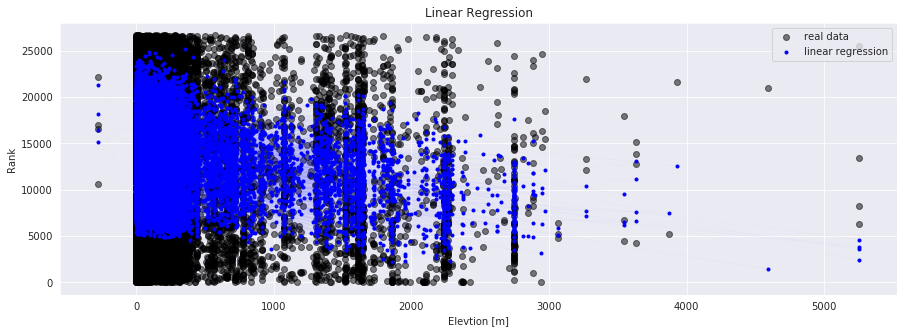

In [590]:
linear_regression_predictions = linear_regression.predict(x)
linear_regression_predictions

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(x[:,2], y, 'o', label="real data", c = 'black', alpha=0.5)                       # plot given data
ax.plot(x[:,2], linear_regression_predictions, 'b--.', label="linear regression", linewidth=0.01) # plot predictions
# ax.plot(X_true, iv_u, 'r--', label='std', linewidth=3)                                # plot std deviations
# ax.plot(X_true, iv_l, 'r--', linewidth=3)
ax.set_title('Linear Regression')
ax.set_xlabel('Elevtion [m]')
ax.set_ylabel('Rank')
ax.legend(loc='best')
plt.show()

#regresja liniowa
#przewidywanie miejsca jakie zajął biegacz na podstawie wysokości, płci oraz wieku
#wynik całkiem dobry biorąc pod uwagę dane wejściowe

In [591]:
print("Model predicted for participant {0} value {1}".format(id, linear_regression_prediction))

Model predicted for participant 1 value [11794.10015139]


In [592]:
print("Real value for participant \"{0}\" is {1}".format(id, test_target[id]))

Real value for participant "1" is 25237


In [593]:
print('Coefficients of a learned model: \n', linear_regression.coef_)

Coefficients of a learned model: 
 [ 2.42792800e+02 -5.45270913e+03 -1.62061552e+00]


### Model evaluation

In [594]:
from sklearn.metrics import mean_squared_error
print("Mean squared error of a learned model: %.2f" %
      mean_squared_error(test_target, linear_regression.predict(test_data)))

Mean squared error of a learned model: 46724622.31


Determining [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) with [r2_score()](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [595]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(test_target, linear_regression.predict(test_data)))

Variance score: 0.20


### Model evaluation with [cross-validation](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

fig. cross-validation (https://en.wikipedia.org/wiki/Cross-validation_(statistics))

##### kroswalidacja
dane dzielimy na trenigowe i testowe wiele razy - otrzymujemy model i testujemy za każdym razem (zazwyczaj 4 "foldy")
chcemy określić jak nasz model relizuje fenomen który jest w danych
pozwala pokazać czy regresja linowa daje zadowalajace wyniki

In [596]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), results_2019[['AgeOnRaceDay','Gender']],results_2019[['RankOverall']], cv=4)
print(scores)

[-40.33648975  -7.65178847  -4.44846496 -40.33280109]


### [Lasso regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) model. A Model with [regularization](https://en.wikipedia.org/wiki/Regularization_(mathematics)

In [597]:
from sklearn.linear_model import Lasso
lasso_regression = Lasso(alpha=10)
lasso_regression.fit(train_data, train_target)
score = lasso_regression.score(test_data, test_target) #r2 score
print("Lasso regression variance score: %.2f" % score)

Lasso regression variance score: 0.20


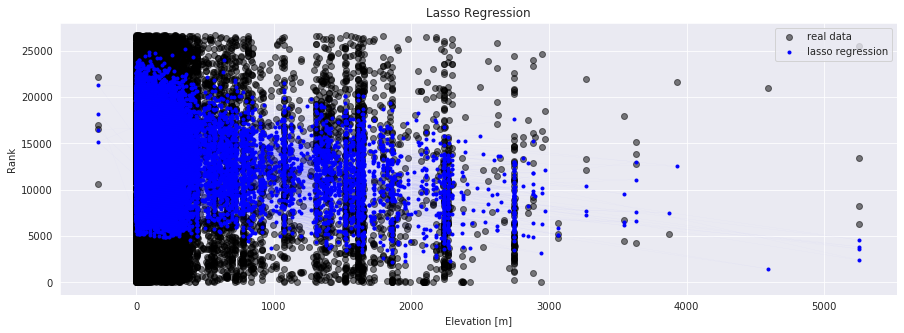

In [598]:
lasso_regression_predictions = lasso_regression.predict(x)
lasso_regression_predictions

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(x[:,2], y, 'o', label="real data", c = 'black', alpha=0.5)                       # plot given data
ax.plot(x[:,2], lasso_regression_predictions, 'b--.', label="lasso regression", linewidth=0.01) # plot predictions
# ax.plot(X_true, iv_u, 'r--', label='std', linewidth=3)                                # plot std deviations
# ax.plot(X_true, iv_l, 'r--', linewidth=3)
ax.set_title('Lasso Regression')
ax.set_xlabel('Elevation [m]')
ax.set_ylabel('Rank')
ax.legend(loc='best')
plt.show()

#regresja z wykorzystaniem regularyzacji
#wynik bardzo podobny do zwykłej regresji liniowej

In [599]:
lasso_regression_prediction = lasso_regression.predict(test_data[id,:].reshape(1,-1))

print("Model predicted for participant {0} value {1}".format(id, lasso_regression_prediction))

Model predicted for participant 1 value [11811.7029481]


In [600]:
print("Real value for participant \"{0}\" is {1}".format(id, test_target[id]))

Real value for participant "1" is 25237


In [601]:
print('Coefficients of a learned model: \n', lasso_regression.coef_)


Coefficients of a learned model: 
 [ 2.42396577e+02 -5.41063003e+03 -1.62105097e+00]
